In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436590

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436590

In [9]:
model = keras.models.load_model('modelos/modeloGeneral_completo/vanilla_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436590

13644/13644 [==============================] - 108s 8ms/step


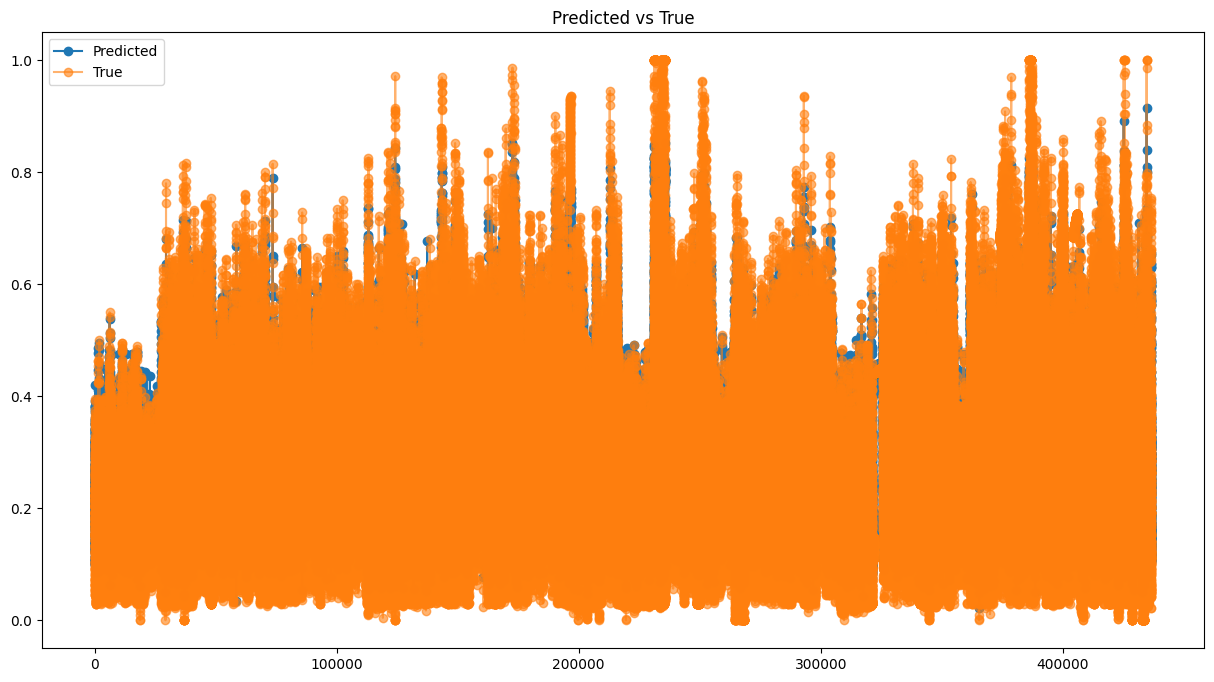

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.04009714438828185,
 'mse': 0.04963082624907956,
 'rmse': 0.0024632189141663248}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          156.488083
1          159.423950
2          154.958832
3          156.140167
4          153.337128
...               ...
436585     106.790100
436586     144.629608
436587     186.256317
436588     216.991623
436589     206.292984

[436590 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436585          137.0
436586          177.0
436587          198.0
436588          216.0
436589          233.0

[436590 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  156.488083
2023-01-01 00:15:00   140.0  159.423950
2023-01-01 00:30:00   139.0  154.958832
2023-01-01 00:45:00   145.0  156.140167
2023-01-01 01:00:00   159.0  153.337128
...                     ...         ...
2035-06-14 18:15:00   137.0  106.790100
2035-06-14 18:30:00   177.0  144.629608
2035-06-14 18:45:00   198.0  186.256317
2035-06-14 19:00:00   216.0  216.991623
2035-06-14 19:15:00   233.0  206.292984

[436590 rows x 2 columns]

AP, BE, EP: (0.8981582220349116, 0.04607537065752916, 0.05576640730755928)


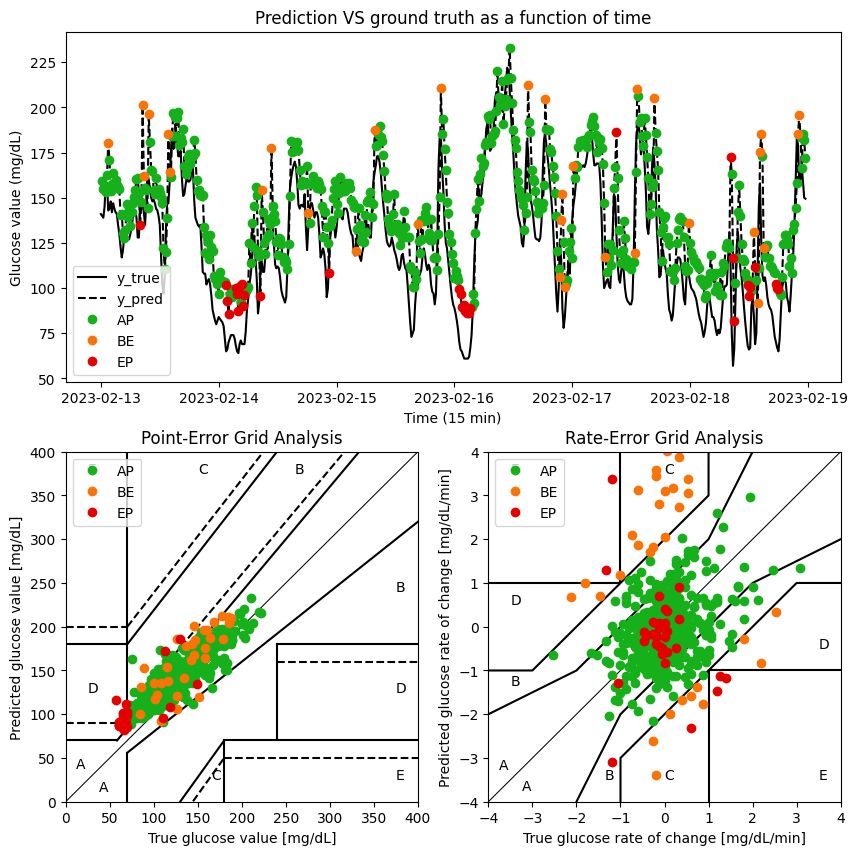

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-13 00:00:00   141.0  156.488083       NaN       NaN    NaN   
1      2023-02-13 00:15:00   140.0  159.423950 -0.066667  0.195724     AP   
2      2023-02-13 00:30:00   139.0  154.958832 -0.066667 -0.297675     AP   
3      2023-02-13 00:45:00   145.0  156.140167  0.400000  0.078756     AP   
4      2023-02-13 01:00:00   159.0  153.337128  0.933333 -0.186869     AP   
...                    ...     ...         ...       ...       ...    ...   
436585 2035-07-27 18:15:00   137.0  106.790100  2.333333  0.182837     BE   
436586 2035-07-27 18:30:00   177.0  144.629608  2.666667  2.522634     AP   
436587 2035-07-27 18:45:00   198.0  186.256317  1.400000  2.775114     AP   
436588 2035-07-27 19:00:00   216.0  216.991623  1.200000  2.049020     AP   
436589 2035-07-27 19:15:00   233.0  206.292984  1.133333 -0.713243     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     B  
...      ...   ...  
436585     A    lD  
436586     A     A  
436587     A     A  
436588     A     A  
436589     A     B  

[436590 rows x 8 columns]

# Predicción a 30 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 50ms/step


Glucose level Predict  Glucose level True
0               0.253235            0.219565
1               0.259617            0.217391

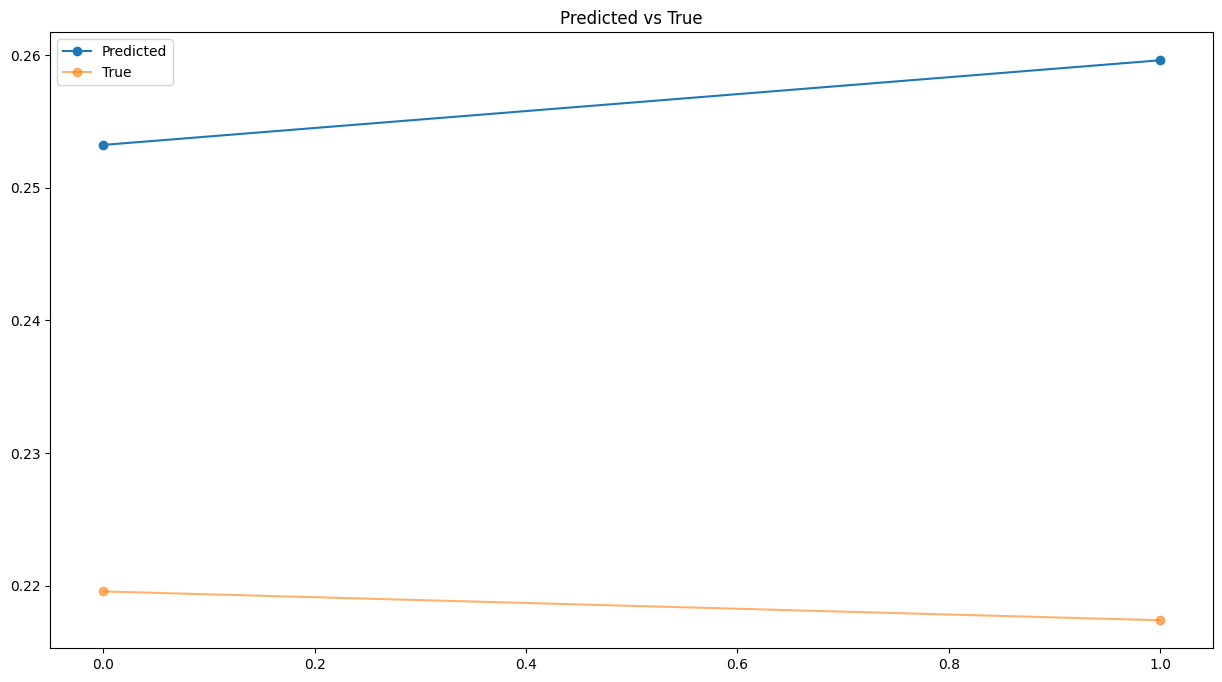

{'mae': 0.037947849994120375,
 'mse': 0.0381882388247838,
 'rmse': 0.001458341584538725}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             156.488083               141.0
1             159.423950               140.0

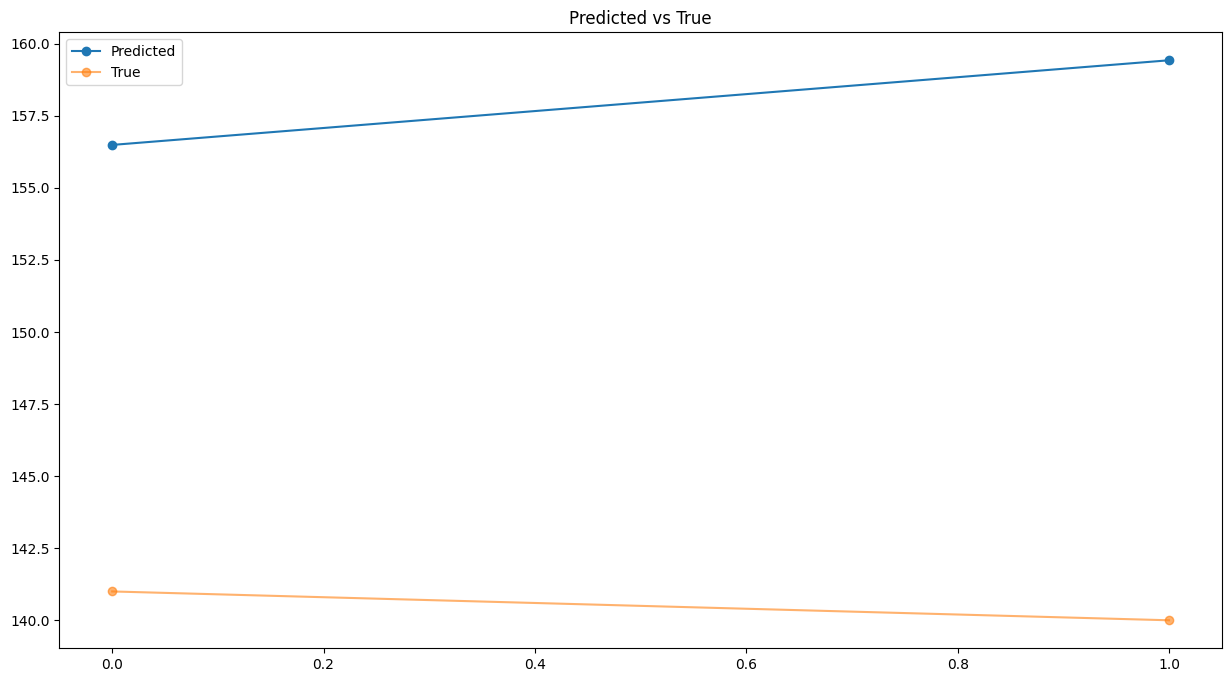

{'mae': 17.456016540527344,
 'mse': 17.566595467898733,
 'rmse': 308.5852763328003}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 50ms/step


Glucose level Predict  Glucose level True
0               0.253235            0.219565
1               0.314233            0.217391

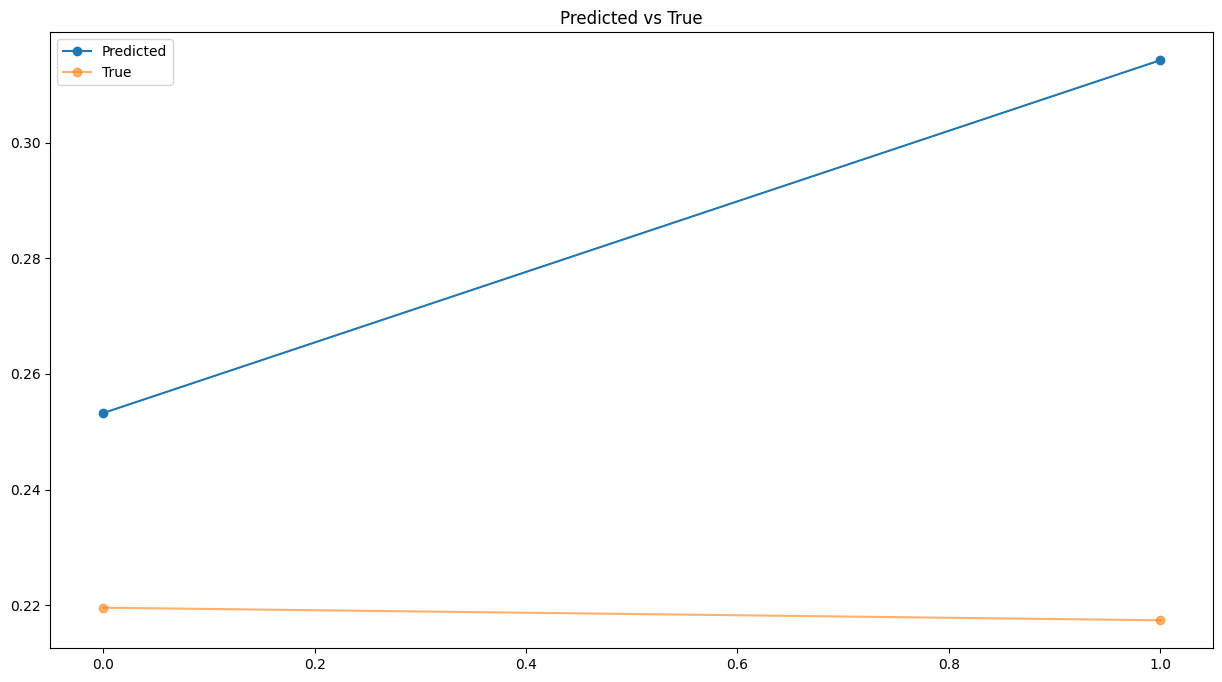

{'mae': 0.06525582230609395,
 'mse': 0.07249829816896443,
 'rmse': 0.00525600323739607}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             156.488083               141.0
1             184.547287               140.0

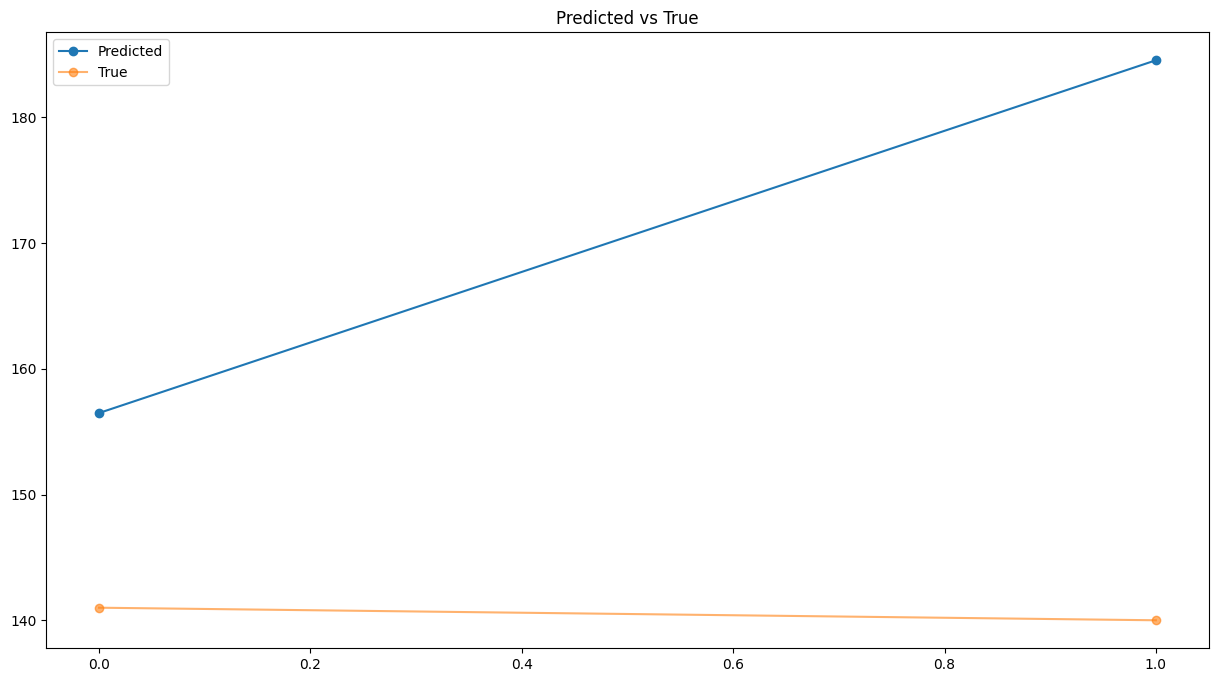

{'mae': 30.017684936523438,
 'mse': 33.34922404948056,
 'rmse': 1112.1707447024528}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 8ms/step


Glucose level Predict  Glucose level True
0               0.287928            0.182609
1               0.269666            0.154348
2               0.208548            0.152174
3               0.187195            0.150000
4               0.200285            0.123913

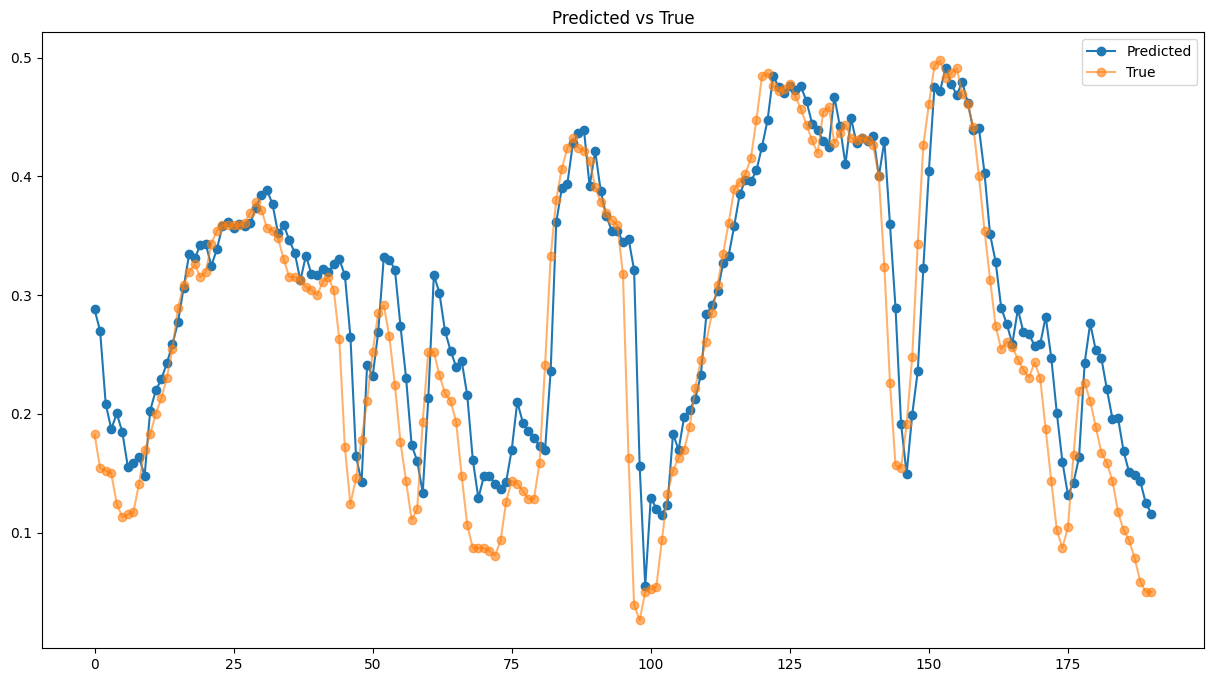

{'mae': 0.039705090319380354,
 'mse': 0.055475175356824176,
 'rmse': 0.0030774950808703924}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

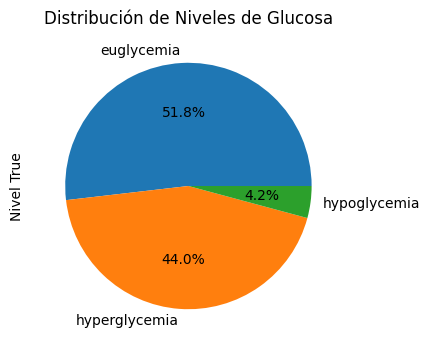

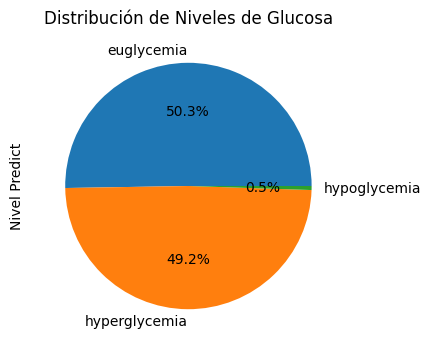

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             172.446976    euglycemia
1               111.0  euglycemia             164.046371    euglycemia
2               110.0  euglycemia             135.932007    euglycemia
3               109.0  euglycemia             126.109512    euglycemia
4                97.0  euglycemia             132.130981    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


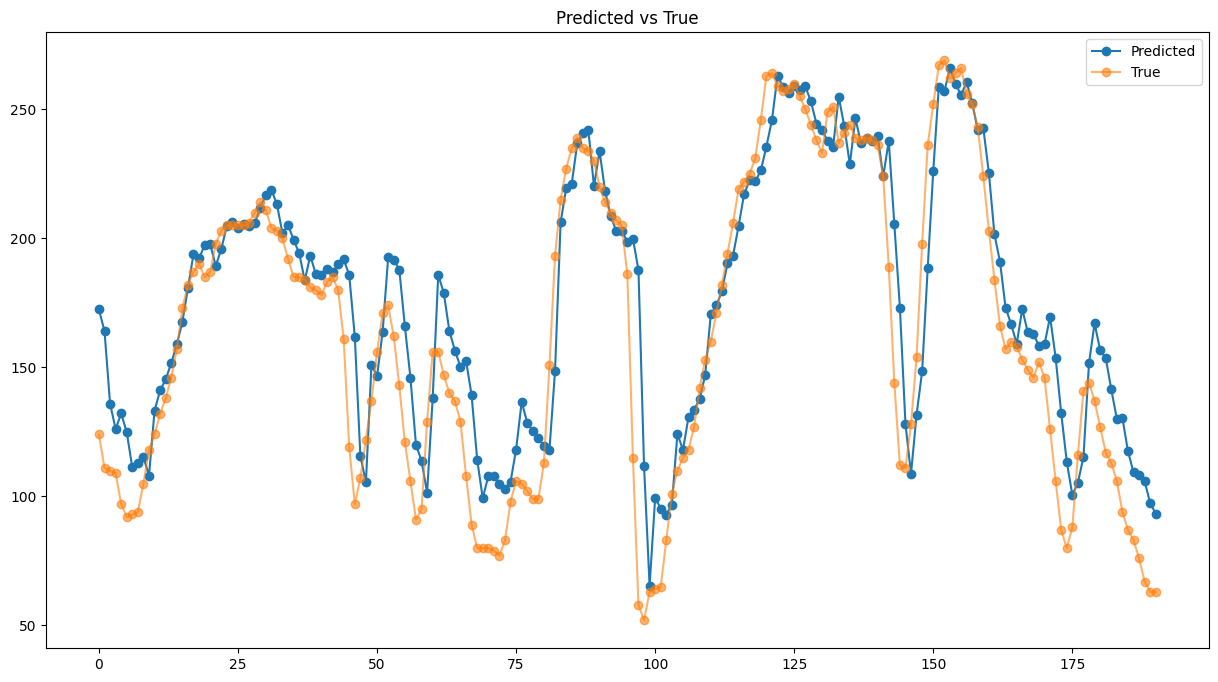

{'mae': 18.26434186366216, 'mse': 25.51858133896459, 'rmse': 651.1979935533518}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  172.446976
2023-01-01 00:15:00   111.0  164.046371
2023-01-01 00:30:00   110.0  135.932007
2023-01-01 00:45:00   109.0  126.109512
2023-01-01 01:00:00    97.0  132.130981
...                     ...         ...
2023-01-02 22:30:00    83.0  109.306458
2023-01-02 22:45:00    76.0  108.374489
2023-01-02 23:00:00    67.0  105.886391
2023-01-02 23:15:00    63.0   97.359413
2023-01-02 23:30:00    63.0   93.291313

[191 rows x 2 columns]

AP, BE, EP: (0.8894736842105263, 0.06842105263157895, 0.042105263157894736)


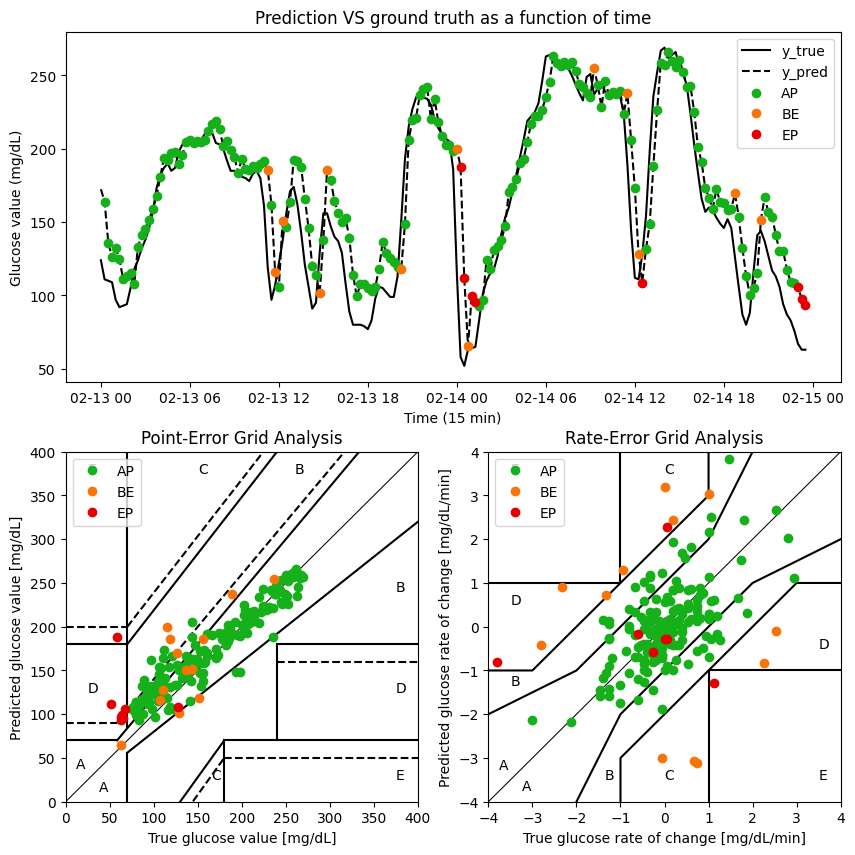

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 0s 8ms/step


Glucose level Predict  Glucose level True
0               0.335716            0.373913
1               0.371717            0.400000
2               0.384667            0.404348
3               0.432239            0.406522
4               0.396007            0.397826

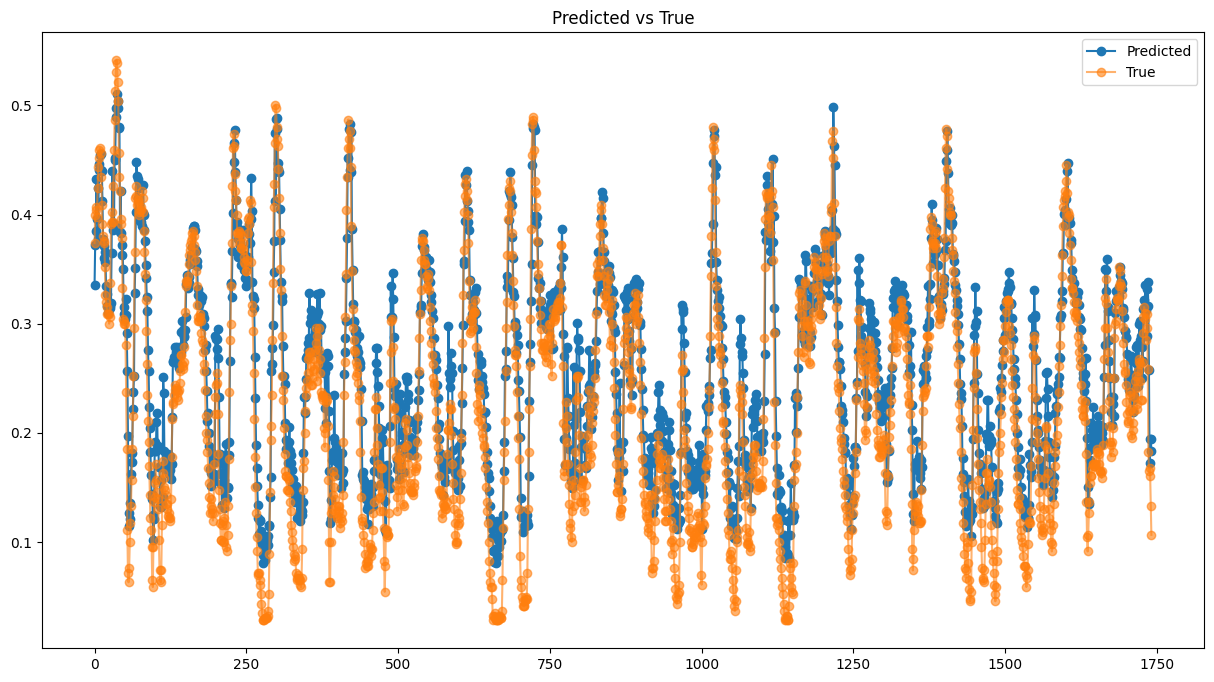

{'mae': 0.03715168099983748,
 'mse': 0.04375454963794623,
 'rmse': 0.0019144606140195006}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

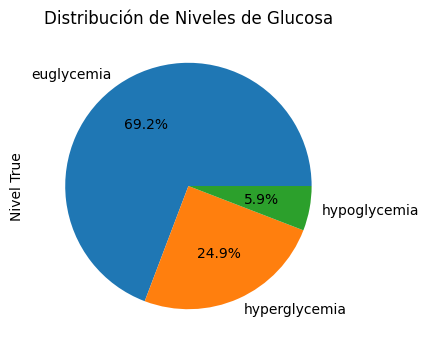

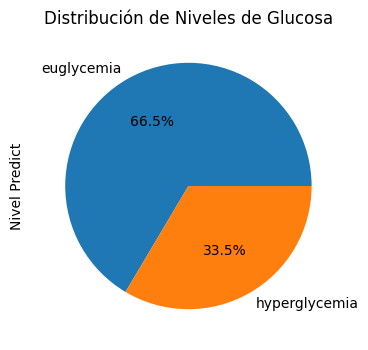

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             194.429230  hyperglycemia
1               224.0  hyperglycemia             210.989731  hyperglycemia
2               226.0  hyperglycemia             216.947006  hyperglycemia
3               227.0  hyperglycemia             238.829956  hyperglycemia
4               223.0  hyperglycemia             222.163071  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


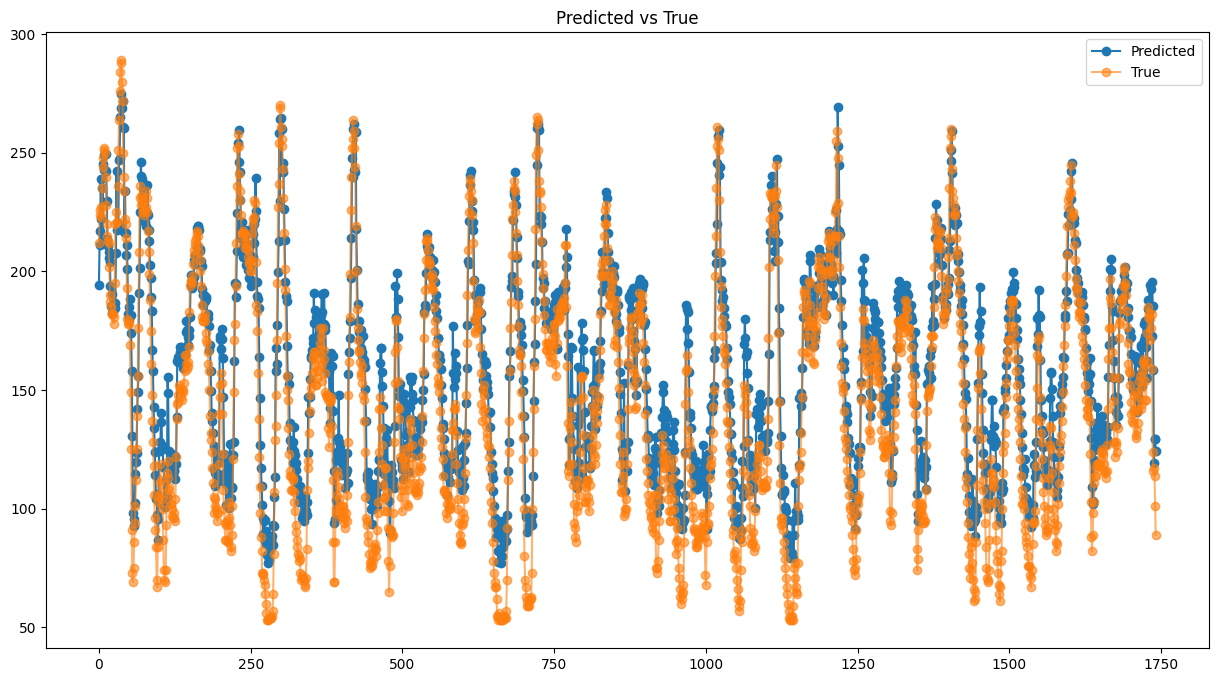

{'mae': 17.089774107905672,
 'mse': 20.127093412924363,
 'rmse': 405.0998892525833}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  194.429230
2023-01-01 00:15:00   224.0  210.989731
2023-01-01 00:30:00   226.0  216.947006
2023-01-01 00:45:00   227.0  238.829956
2023-01-01 01:00:00   223.0  222.163071
...                     ...         ...
2023-01-19 02:15:00   116.0  158.345901
2023-01-19 02:30:00   117.0  119.179237
2023-01-19 02:45:00   114.0  129.391602
2023-01-19 03:00:00   101.0  129.522705
2023-01-19 03:15:00    89.0  124.187897

[1742 rows x 2 columns]

AP, BE, EP: (0.919586444572085, 0.01665709362435382, 0.06375646180356118)


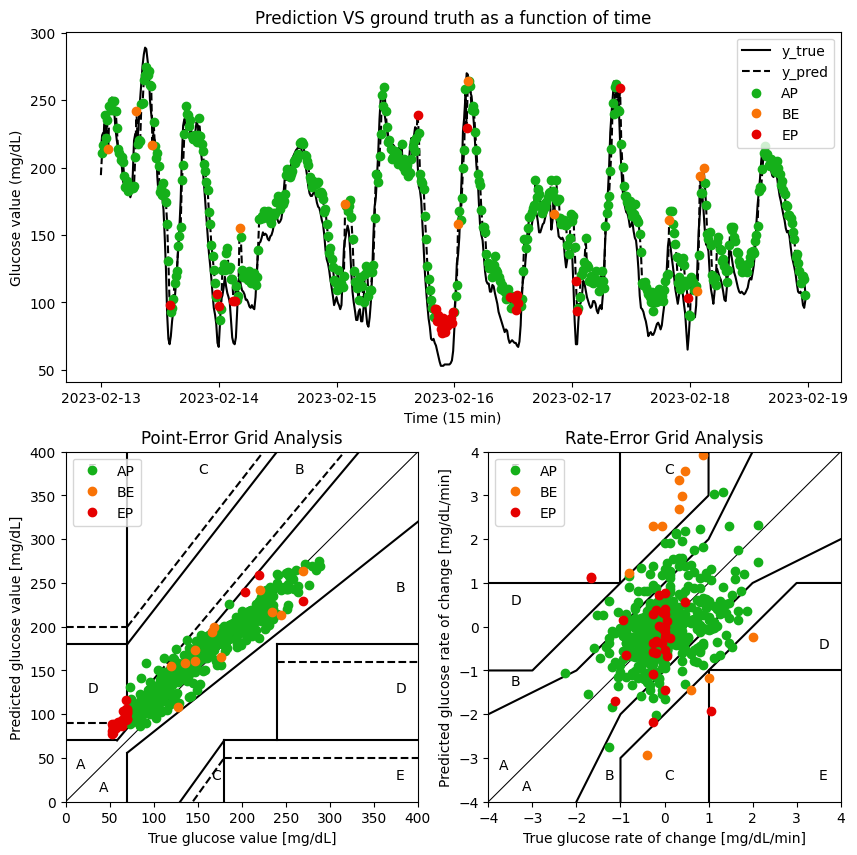

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 1s 6ms/step


Glucose level Predict  Glucose level True
0               0.314686            0.261858
1               0.288592            0.229051
2               0.271119            0.196245
3               0.244333            0.163439
4               0.212774            0.130632

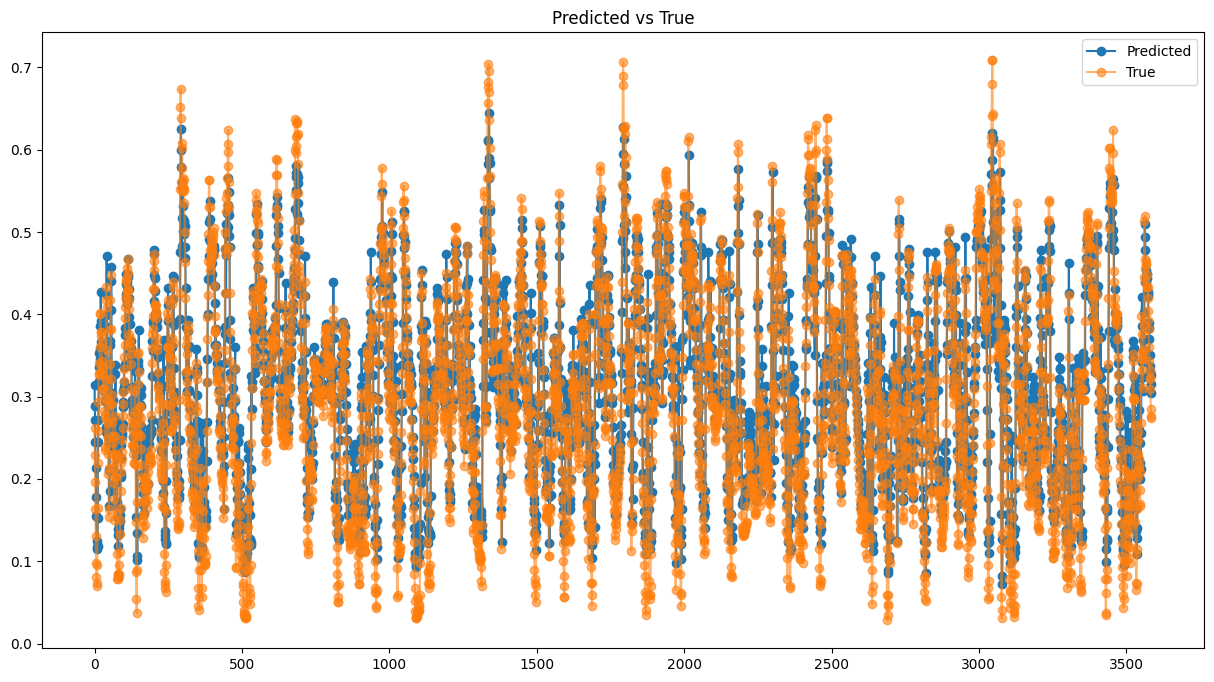

{'mae': 0.04189048915471932,
 'mse': 0.05212795511528334,
 'rmse': 0.0027173237045009947}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

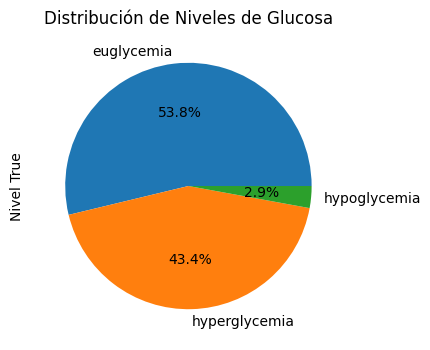

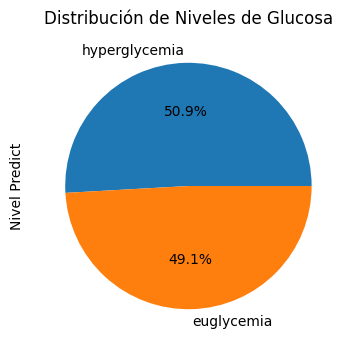

Glucose level True  Nivel True  Glucose level Predict  Nivel Predict
0          160.454545  euglycemia             184.755356  hyperglycemia
1          145.363636  euglycemia             172.752441     euglycemia
2          130.272727  euglycemia             164.714874     euglycemia
3          115.181818  euglycemia             152.393311     euglycemia
4          100.090909  euglycemia             137.876160     euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


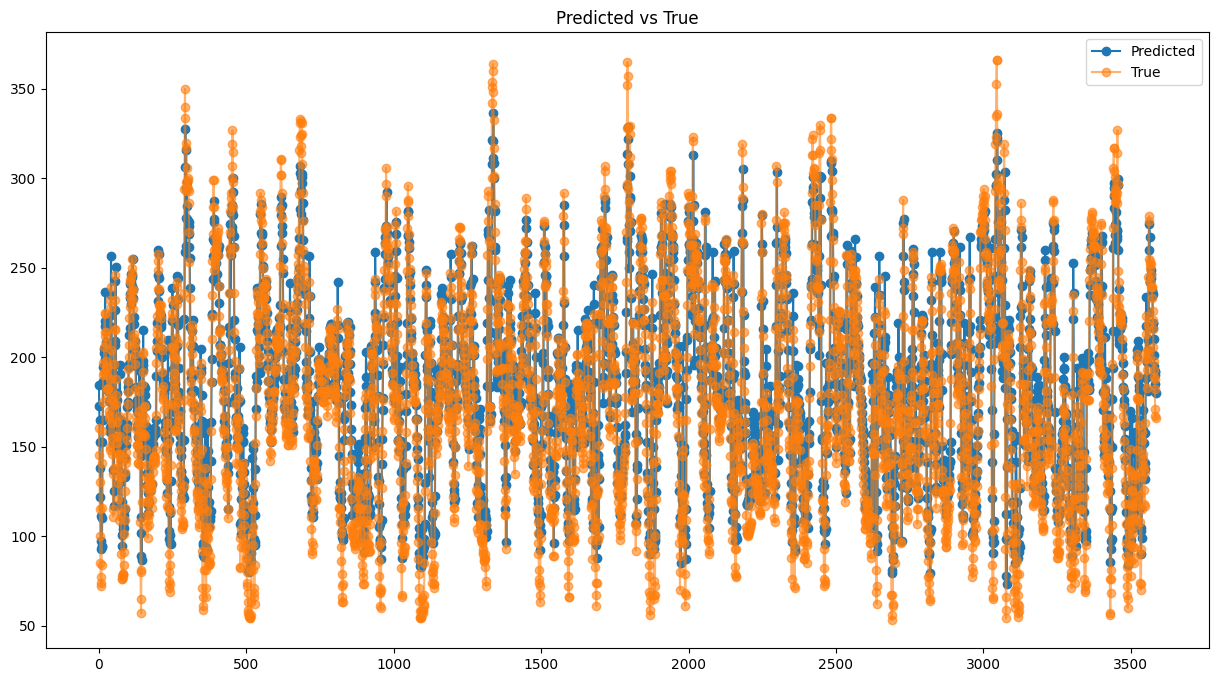

{'mae': 19.269626037165285,
 'mse': 23.97886014766906,
 'rmse': 574.9857339814715}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  184.755356
2023-01-01 00:15:00  145.363636  172.752441
2023-01-01 00:30:00  130.272727  164.714874
2023-01-01 00:45:00  115.181818  152.393311
2023-01-01 01:00:00  100.090909  137.876160
...                         ...         ...
2023-02-07 07:15:00  188.000000  192.498352
2023-02-07 07:30:00  182.000000  191.715729
2023-02-07 07:45:00  171.000000  190.062119
2023-02-07 08:00:00  167.000000  184.855484
2023-02-07 08:15:00  166.000000  179.886871

[3586 rows x 2 columns]

AP, BE, EP: (0.8789400278940028, 0.06443514644351464, 0.056624825662482565)


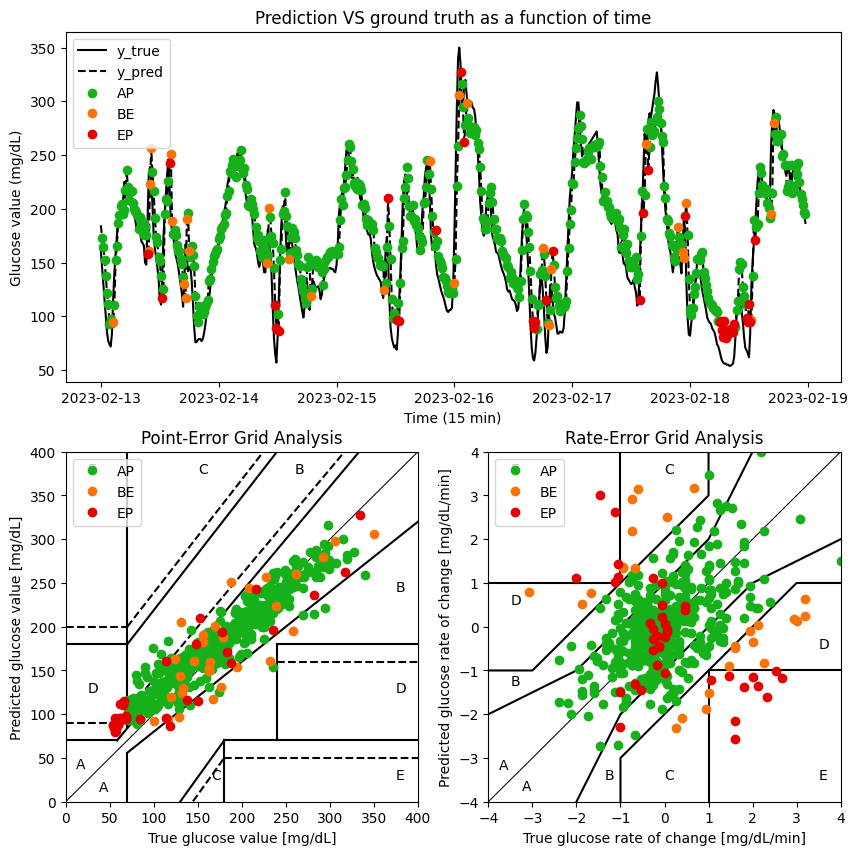

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 2s 9ms/step


Glucose level Predict  Glucose level True
0               0.504285            0.534783
1               0.493156            0.500000
2               0.498853            0.484783
3               0.449045            0.463043
4               0.475022            0.428261

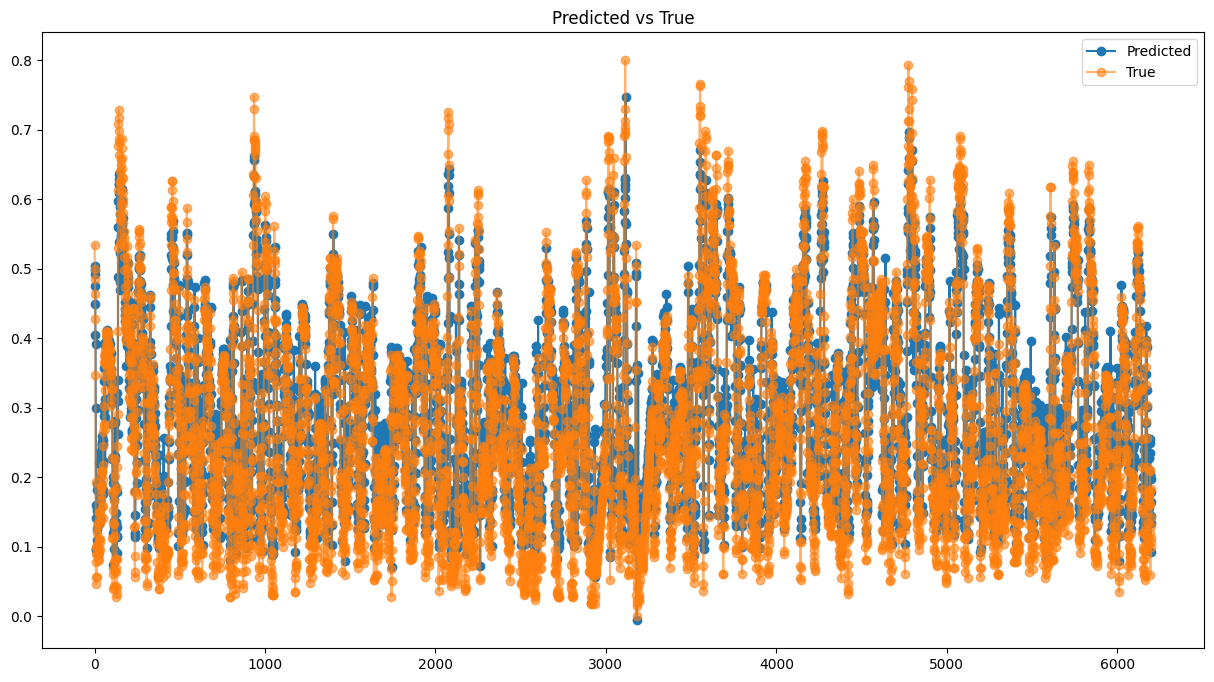

{'mae': 0.04776584872787453,
 'mse': 0.06082107755482893,
 'rmse': 0.0036992034749305154}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

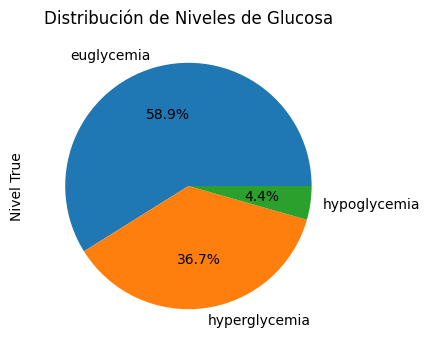

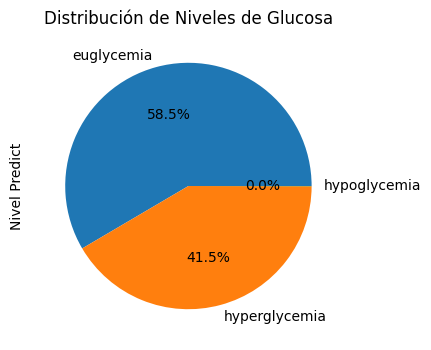

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             271.970856  hyperglycemia
1               270.0  hyperglycemia             266.851562  hyperglycemia
2               263.0  hyperglycemia             269.472229  hyperglycemia
3               253.0  hyperglycemia             246.560852  hyperglycemia
4               237.0  hyperglycemia             258.509949  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


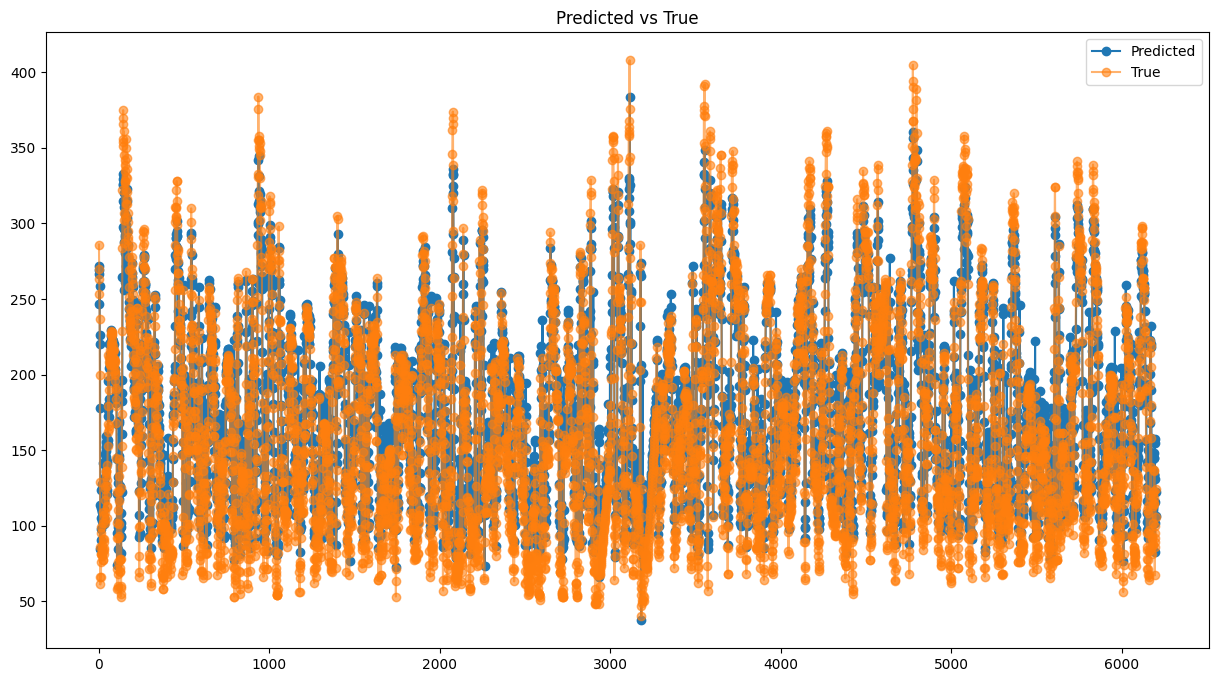

{'mae': 21.97229146431004, 'mse': 27.97769666707864, 'rmse': 782.7515107950632}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  271.970856
2023-01-01 00:15:00   270.0  266.851562
2023-01-01 00:30:00   263.0  269.472229
2023-01-01 00:45:00   253.0  246.560852
2023-01-01 01:00:00   237.0  258.509949
...                     ...         ...
2023-03-06 13:00:00   100.0   82.750435
2023-03-06 13:15:00    89.0  130.878586
2023-03-06 13:30:00    92.0  115.532104
2023-03-06 13:45:00   106.0  106.628136
2023-03-06 14:00:00   124.0  122.242676

[6201 rows x 2 columns]

AP, BE, EP: (0.8385483870967742, 0.08612903225806452, 0.07532258064516129)


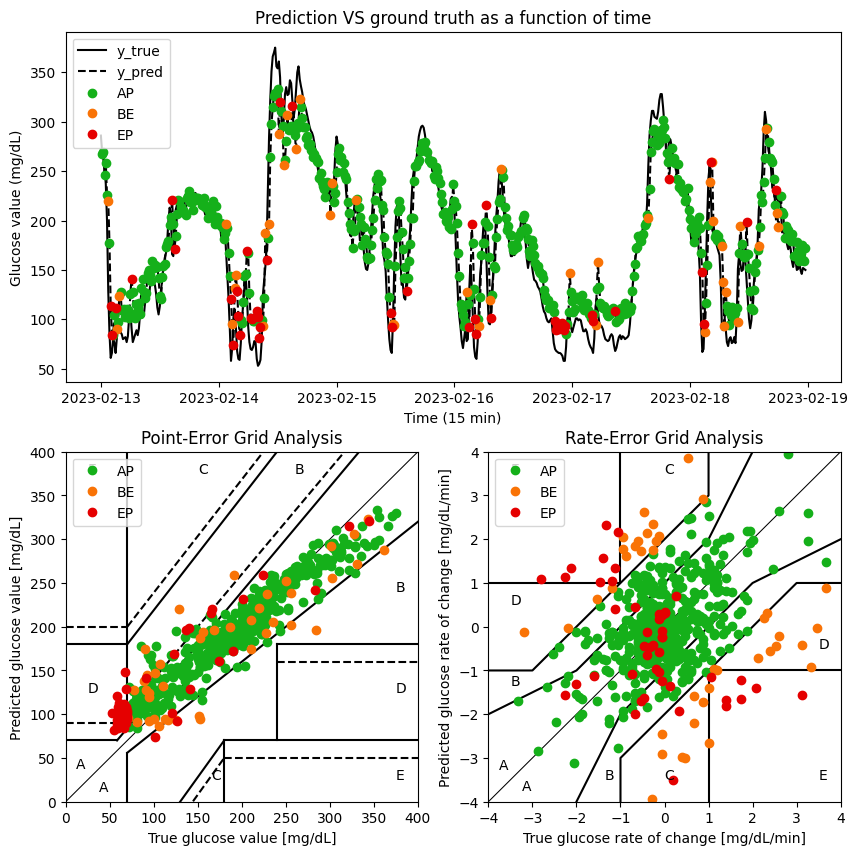

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)